In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os
from statistics import mode


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [7]:
col1 = '#f659fd'
col2 = '#33efff'
bg_color = '#060F38'
line_color = '#ffffff'
green = '#69f900'
red = '#ff4b44'

In [49]:
df = pd.read_csv(r"D:\FData\LaLiga_2024_25\till_gw13.csv")

In [46]:
df = pd.read_csv(r"D:\FData\EPL_2024_25\till_gw11.csv")

In [51]:
df = pd.read_csv(r"D:\FData\Serie_A_2024_25\till_gw12.csv")

In [54]:
df = pd.read_csv(r"D:\FData\Bundesliga_2024_25\bundesliga_24_25_event_data_till_gw10.csv")

In [73]:
df = pd.read_csv(r"D:\FData\Ligue1_2024_25\ligue1_24_25_event_data_till_gw11.csv")

In [3]:
df = pd.read_csv(r"D:\FData\UCL\UCL_2024_25\till_mw5.csv")

In [6]:
col1 = '#A50044'
col2 = '#004D98'

# Function

C:\Users\h\AppData\Local\Temp\ipykernel_8592\3574768090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_8592\3574768090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']


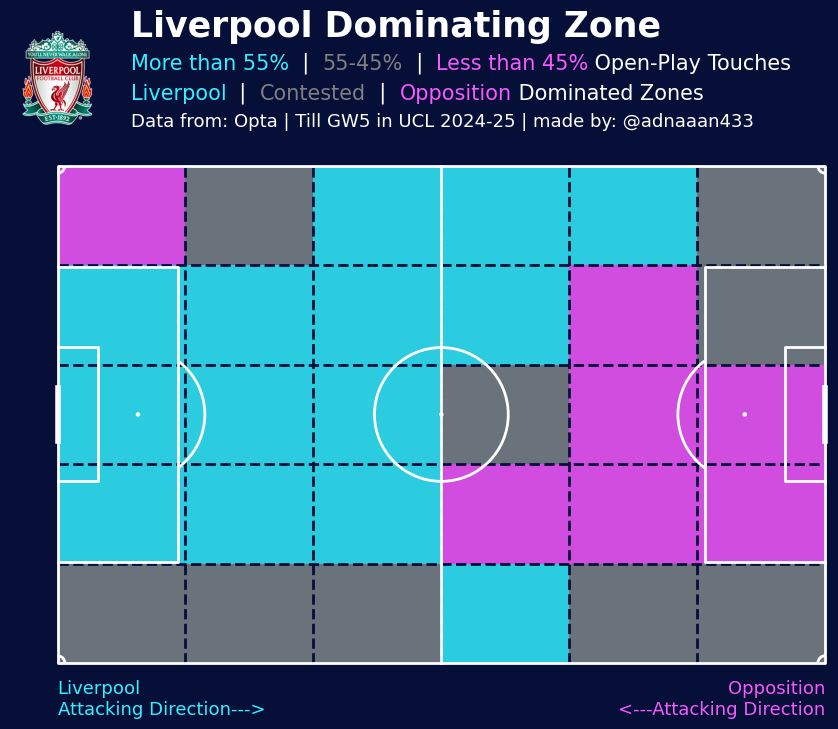

In [9]:
def plot_congestion(ax, team_name):
    df_plot = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)]
    pcmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",  [col1, 'gray', col2], N=20)
    df1 = df_plot[(df_plot['teamName']==team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2 = df_plot[(df_plot['teamName']!=team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2['x'] = 105-df2['x']
    df2['y'] =  68-df2['y']
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5,68.5)
    ax.set_xlim(-0.5,105.5)

    bin_statistic1 = pitch.bin_statistic(df1.x, df1.y, bins=(6,5), statistic='count', normalize=False)
    bin_statistic2 = pitch.bin_statistic(df2.x, df2.y, bins=(6,5), statistic='count', normalize=False)

    # Assuming 'cx' and 'cy' are as follows:
    cx = np.array([[ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25]])

    cy = np.array([[61.2, 61.2, 61.2, 61.2, 61.2, 61.2],
               [47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
               [34.0, 34.0, 34.0, 34.0, 34.0, 34.0],
               [20.4, 20.4, 20.4, 20.4, 20.4, 20.4],
               [ 6.8,  6.8,  6.8,  6.8,  6.8,  6.8]])

    # Flatten the arrays
    cx_flat = cx.flatten()
    cy_flat = cy.flatten()

    # Create a DataFrame
    df_cong = pd.DataFrame({'cx': cx_flat, 'cy': cy_flat})

    hd_values = []


    # Loop through the 2D arrays
    for i in range(bin_statistic1['statistic'].shape[0]):
        for j in range(bin_statistic1['statistic'].shape[1]):
            stat1 = bin_statistic1['statistic'][i, j]
            stat2 = bin_statistic2['statistic'][i, j]
        
            if (stat1 / (stat1 + stat2)) > 0.55:
                hd_values.append(1)
            elif (stat1 / (stat1 + stat2)) < 0.45:
                hd_values.append(0)
            else:
                hd_values.append(0.5)

    df_cong['hd']=hd_values
    bin_stat = pitch.bin_statistic(df_cong.cx, df_cong.cy, bins=(6,5), values=df_cong['hd'], statistic='sum', normalize=False)
    pitch.heatmap(bin_stat, ax=ax, cmap=pcmap, edgecolors='#000000', lw=0, zorder=3, alpha=0.85)

    ax_text(10, 78, s=f"<{team_name}>  |  <Contested>  |  <Opposition> Dominated Zones", highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}],
            color=line_color, fontsize=15, ha='left', va='center', ax=ax)
    ax_text(10, 82, s=f"<More than 55%>  |  <55-45%>  |  <Less than 45%> Open-Play Touches", highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}],
            color=line_color, fontsize=15, ha='left', va='center', ax=ax)
    ax.text(10, 87, f"{team_name} Dominating Zone", color=line_color, fontsize=25, fontweight='bold', ha='left', va='center')
    ax.text(0,  -5, f'{team_name}\nAttacking Direction--->', color=col2, fontsize=13, ha='left', va='center')
    ax.text(105,-5, f'Opposition\n<---Attacking Direction', color=col1, fontsize=13, ha='right', va='center')
    ax.text(10, 74, f'Data from: Opta | Till GW5 in UCL 2024-25 | made by: @adnaaan433', fontsize=13, color=line_color, ha='left', va='center')

    ax.vlines(1*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(2*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(3*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(4*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(5*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)

    ax.hlines(1*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(2*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(3*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(4*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)

    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(0, 80, image, height=13, ax=ax)
    
    return

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
plot_congestion(ax, 'Liverpool')

# LaLiga

C:\Users\h\AppData\Local\Temp\ipykernel_9464\4029510094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_9464\4029510094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']


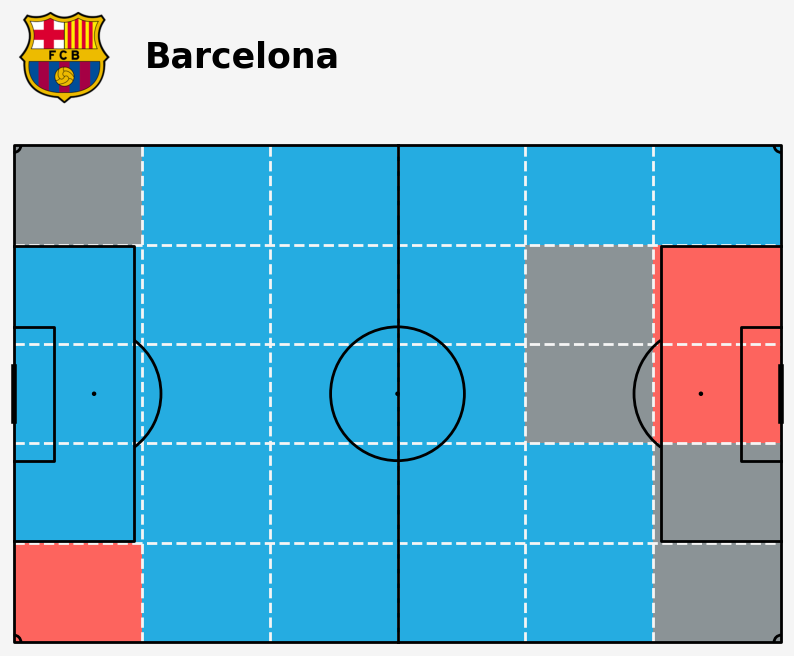

In [10]:
def plot_congestion(ax, team_name):
    df_plot = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)]
    pcmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",  [col1, 'gray', col2], N=20)
    df1 = df_plot[(df_plot['teamName']==team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2 = df_plot[(df_plot['teamName']!=team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2['x'] = 105-df2['x']
    df2['y'] =  68-df2['y']
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5,68.5)
    ax.set_xlim(-0.5,105.5)

    bin_statistic1 = pitch.bin_statistic(df1.x, df1.y, bins=(6,5), statistic='count', normalize=False)
    bin_statistic2 = pitch.bin_statistic(df2.x, df2.y, bins=(6,5), statistic='count', normalize=False)

    # Assuming 'cx' and 'cy' are as follows:
    cx = np.array([[ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25]])

    cy = np.array([[61.2, 61.2, 61.2, 61.2, 61.2, 61.2],
               [47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
               [34.0, 34.0, 34.0, 34.0, 34.0, 34.0],
               [20.4, 20.4, 20.4, 20.4, 20.4, 20.4],
               [ 6.8,  6.8,  6.8,  6.8,  6.8,  6.8]])

    # Flatten the arrays
    cx_flat = cx.flatten()
    cy_flat = cy.flatten()

    # Create a DataFrame
    df_cong = pd.DataFrame({'cx': cx_flat, 'cy': cy_flat})

    hd_values = []


    # Loop through the 2D arrays
    for i in range(bin_statistic1['statistic'].shape[0]):
        for j in range(bin_statistic1['statistic'].shape[1]):
            stat1 = bin_statistic1['statistic'][i, j]
            stat2 = bin_statistic2['statistic'][i, j]
        
            if (stat1 / (stat1 + stat2)) > 0.55:
                hd_values.append(1)
            elif (stat1 / (stat1 + stat2)) < 0.45:
                hd_values.append(0)
            else:
                hd_values.append(0.5)

    df_cong['hd']=hd_values
    bin_stat = pitch.bin_statistic(df_cong.cx, df_cong.cy, bins=(6,5), values=df_cong['hd'], statistic='sum', normalize=False)
    pitch.heatmap(bin_stat, ax=ax, cmap=pcmap, edgecolors='#000000', lw=0, zorder=3, alpha=0.85)

    ax.text(18, 80, f"{team_name}", color=line_color, fontsize=25, fontweight='bold', ha='left', va='center')

    ax.vlines(1*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(2*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(3*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(4*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(5*(105/6), ymin=0, ymax=68, color=bg_color, lw=2, ls='--', zorder=5)

    ax.hlines(1*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(2*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(3*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(4*(68/5), xmin=0, xmax=105, color=bg_color, lw=2, ls='--', zorder=5)

    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(7, 80, image, height=13, ax=ax)
    
    return

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
plot_congestion(ax, 'Barcelona')

C:\Users\h\AppData\Local\Temp\ipykernel_9464\4029510094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_9464\4029510094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_9464\4029510094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

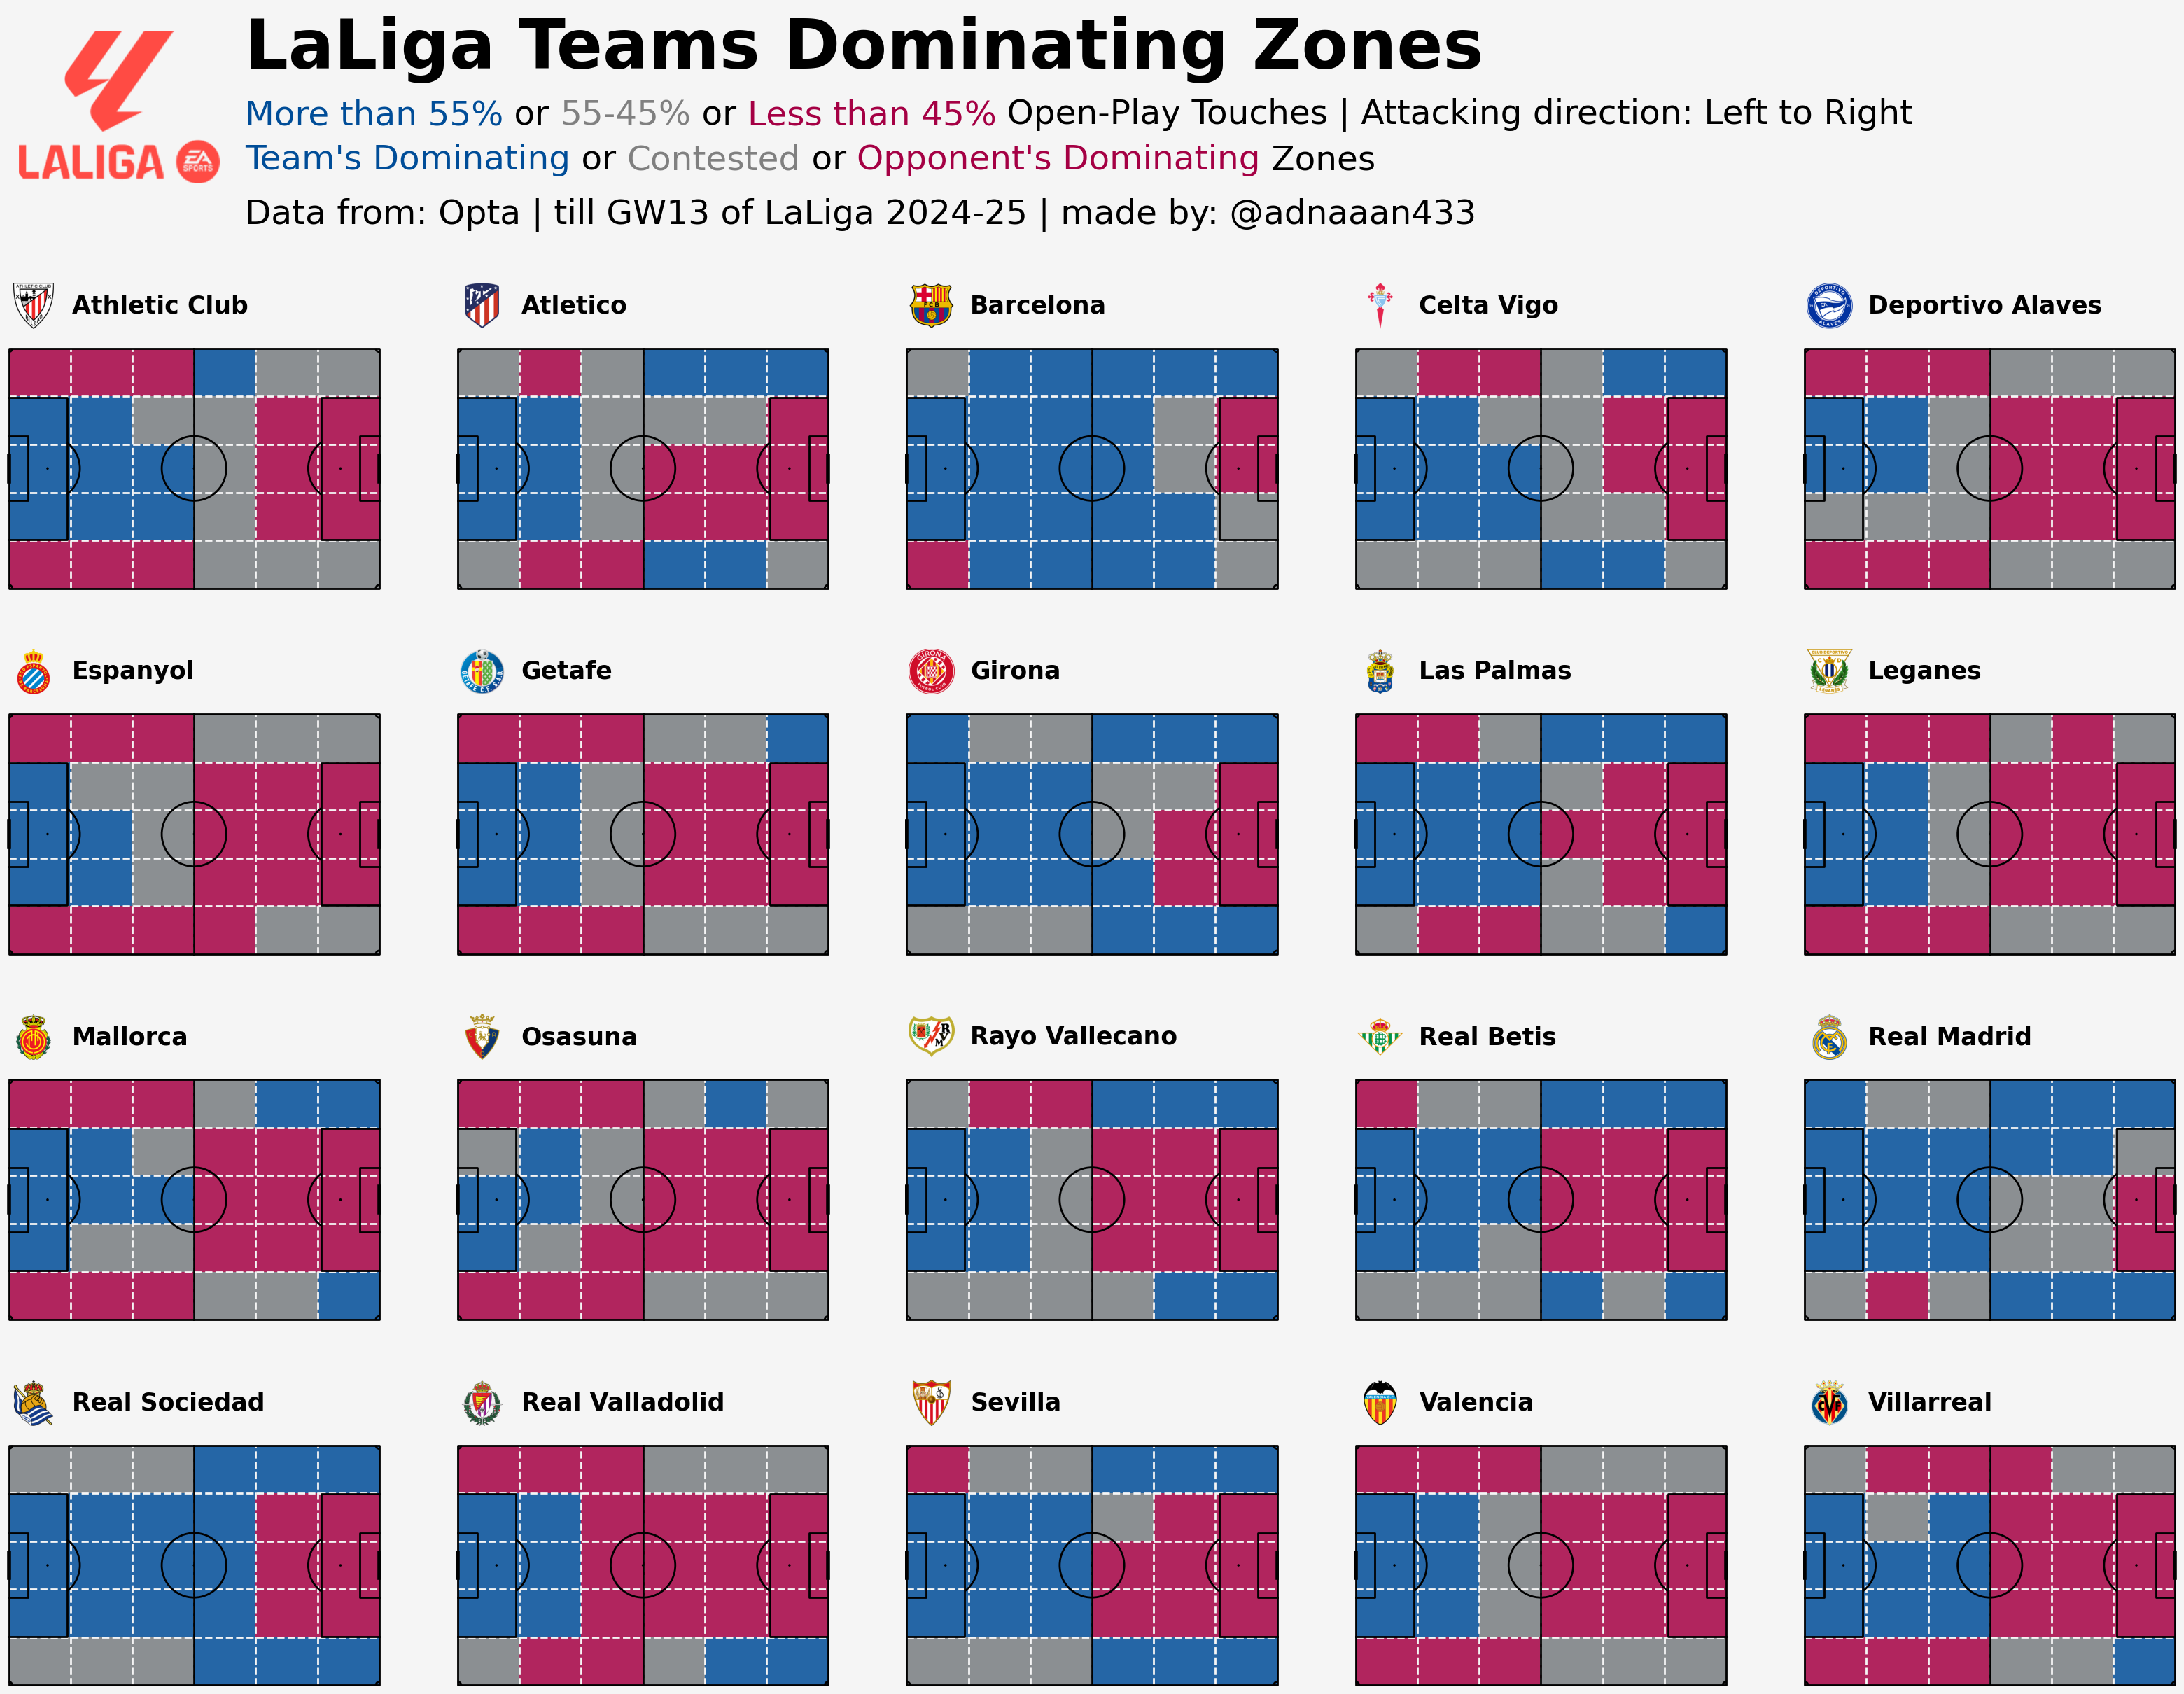

In [67]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(40, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion(axes[i], team_name)
    # plot_blank(axes[i])

fig.text(0.21, 1.045, 'LaLiga Teams Dominating Zones', fontsize=70, fontweight='bold', ha='left', va='top')
fig_text(0.21, 1, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches | Attacking direction: Left to Right",
         fontsize=35, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.975, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=35, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.945, "Data from: Opta | till GW13 of LaLiga 2024-25 | made by: @adnaaan433",
         fontsize=35, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.11, bottom=0.94, width=0.11, height=0.11)

# Vertical

In [28]:
# def plot_blank(ax):
#     pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=bg_color, linewidth=2, line_zorder=6)
#     pitch.draw(ax=ax)
#     ax.set_ylim(-0.5,68.5)
#     ax.set_xlim(-0.5,105.5)

def plot_blank_ver(ax):
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5,105.5)
    ax.set_xlim(-0.5, 68.5)

def plot_direction_ver(ax):
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=bg_color, linewidth=2, line_zorder=1)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5, 105.5)
    ax.set_xlim(-0.5, 68.5)
    arrow = patches.FancyArrowPatch((30, 30), (30, 90), arrowstyle='->', ls='--', 
                                        color=col2, zorder=4, mutation_scale=75, alpha=1, linewidth=7.5)
    ax.add_patch(arrow)
    ax.text(34, 18, 'Attacking Direction', color=col2, fontsize=20, fontweight='bold', ha='center', va='center')

In [ ]:
def plot_congestion_ver(ax, team_name):
    df_plot = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)]
    pcmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",  [col1, 'gray', col2], N=20)
    df1 = df_plot[(df_plot['teamName']==team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2 = df_plot[(df_plot['teamName']!=team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2['x'] = 105-df2['x']
    df2['y'] =  68-df2['y']
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5, 105.5)
    ax.set_xlim(-0.5, 68.5)
    ax.invert_xaxis()

    bin_statistic1 = pitch.bin_statistic(df1.x, df1.y, bins=(6,5), statistic='count', normalize=False)
    bin_statistic2 = pitch.bin_statistic(df2.x, df2.y, bins=(6,5), statistic='count', normalize=False)

    # Assuming 'cx' and 'cy' are as follows:
    cx = np.array([[ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25]])

    cy = np.array([[61.2, 61.2, 61.2, 61.2, 61.2, 61.2],
               [47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
               [34.0, 34.0, 34.0, 34.0, 34.0, 34.0],
               [20.4, 20.4, 20.4, 20.4, 20.4, 20.4],
               [ 6.8,  6.8,  6.8,  6.8,  6.8,  6.8]])

    # Flatten the arrays
    cx_flat = cx.flatten()
    cy_flat = cy.flatten()

    # Create a DataFrame
    df_cong = pd.DataFrame({'cx': cx_flat, 'cy': cy_flat})

    hd_values = []


    # Loop through the 2D arrays
    for i in range(bin_statistic1['statistic'].shape[0]):
        for j in range(bin_statistic1['statistic'].shape[1]):
            stat1 = bin_statistic1['statistic'][i, j]
            stat2 = bin_statistic2['statistic'][i, j]
        
            if (stat1 / (stat1 + stat2)) > 0.55:
                hd_values.append(1)
            elif (stat1 / (stat1 + stat2)) < 0.45:
                hd_values.append(0)
            else:
                hd_values.append(0.5)

    df_cong['hd']=hd_values
    bin_stat = pitch.bin_statistic(df_cong.cx, df_cong.cy, bins=(6,5), values=df_cong['hd'], statistic='sum', normalize=False)
    pitch.heatmap(bin_stat, ax=ax, cmap=pcmap, edgecolors='#000000', lw=0, zorder=3, alpha=0.85)

    ax.text(50, 117, f"{team_name}", color=line_color, fontsize=22, fontweight='bold', ha='left', va='center')

    ax.hlines(1*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(2*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(3*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(4*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(5*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)

    ax.vlines(1*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(2*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(3*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(4*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)

    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(117, 61, image, height=13, ax=ax)
    
    return

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
plot_congestion_ver(ax, 'Barcelona')
# plot_direction_ver(ax)

C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']


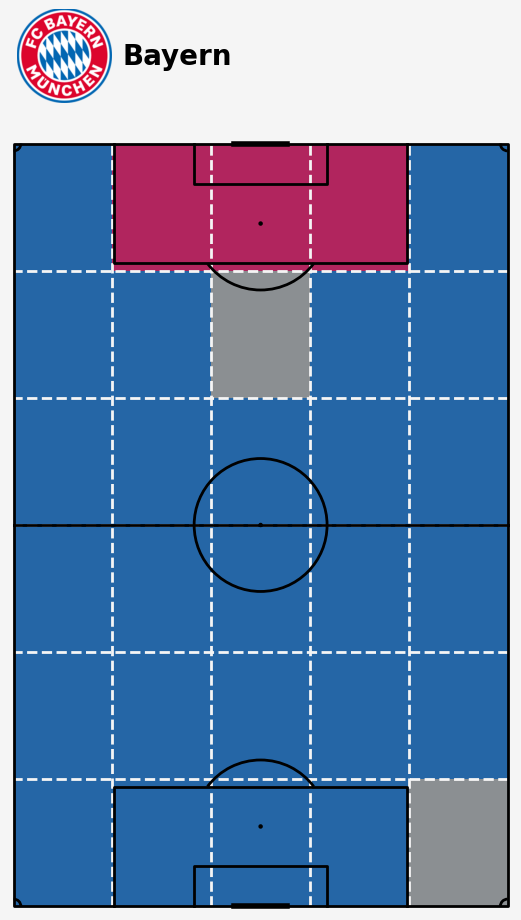

In [68]:
def plot_congestion_ver_selenium(ax, team_name):
    match_ids = df[df['teamName']==team_name]['matchId'].unique()
    df_plot = df[df['matchId'].isin(match_ids)]
    pcmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",  [col1, 'gray', col2], N=20)
    df1 = df_plot[(df_plot['teamName']==team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2 = df_plot[(df_plot['teamName']!=team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2['x'] = 105-df2['x']
    df2['y'] =  68-df2['y']
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5, 105.5)
    ax.set_xlim(-0.5, 68.5)
    ax.invert_xaxis()

    bin_statistic1 = pitch.bin_statistic(df1.x, df1.y, bins=(6,5), statistic='count', normalize=False)
    bin_statistic2 = pitch.bin_statistic(df2.x, df2.y, bins=(6,5), statistic='count', normalize=False)

    # Assuming 'cx' and 'cy' are as follows:
    cx = np.array([[ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25]])

    cy = np.array([[61.2, 61.2, 61.2, 61.2, 61.2, 61.2],
               [47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
               [34.0, 34.0, 34.0, 34.0, 34.0, 34.0],
               [20.4, 20.4, 20.4, 20.4, 20.4, 20.4],
               [ 6.8,  6.8,  6.8,  6.8,  6.8,  6.8]])

    # Flatten the arrays
    cx_flat = cx.flatten()
    cy_flat = cy.flatten()

    # Create a DataFrame
    df_cong = pd.DataFrame({'cx': cx_flat, 'cy': cy_flat})

    hd_values = []


    # Loop through the 2D arrays
    for i in range(bin_statistic1['statistic'].shape[0]):
        for j in range(bin_statistic1['statistic'].shape[1]):
            stat1 = bin_statistic1['statistic'][i, j]
            stat2 = bin_statistic2['statistic'][i, j]
        
            if (stat1 / (stat1 + stat2)) > 0.55:
                hd_values.append(1)
            elif (stat1 / (stat1 + stat2)) < 0.45:
                hd_values.append(0)
            else:
                hd_values.append(0.5)

    df_cong['hd']=hd_values
    bin_stat = pitch.bin_statistic(df_cong.cx, df_cong.cy, bins=(6,5), values=df_cong['hd'], statistic='sum', normalize=False)
    pitch.heatmap(bin_stat, ax=ax, cmap=pcmap, edgecolors='#000000', lw=0, zorder=3, alpha=0.85)

    ax.text(53, 117, f"{team_name}", color=line_color, fontsize=20, fontweight='bold', ha='left', va='center')

    ax.hlines(1*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(2*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(3*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(4*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(5*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)

    ax.vlines(1*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(2*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(3*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(4*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)

    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(117, 61, image, height=13, ax=ax)
    
    return

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
plot_congestion_ver_selenium(ax, 'Bayern')

C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

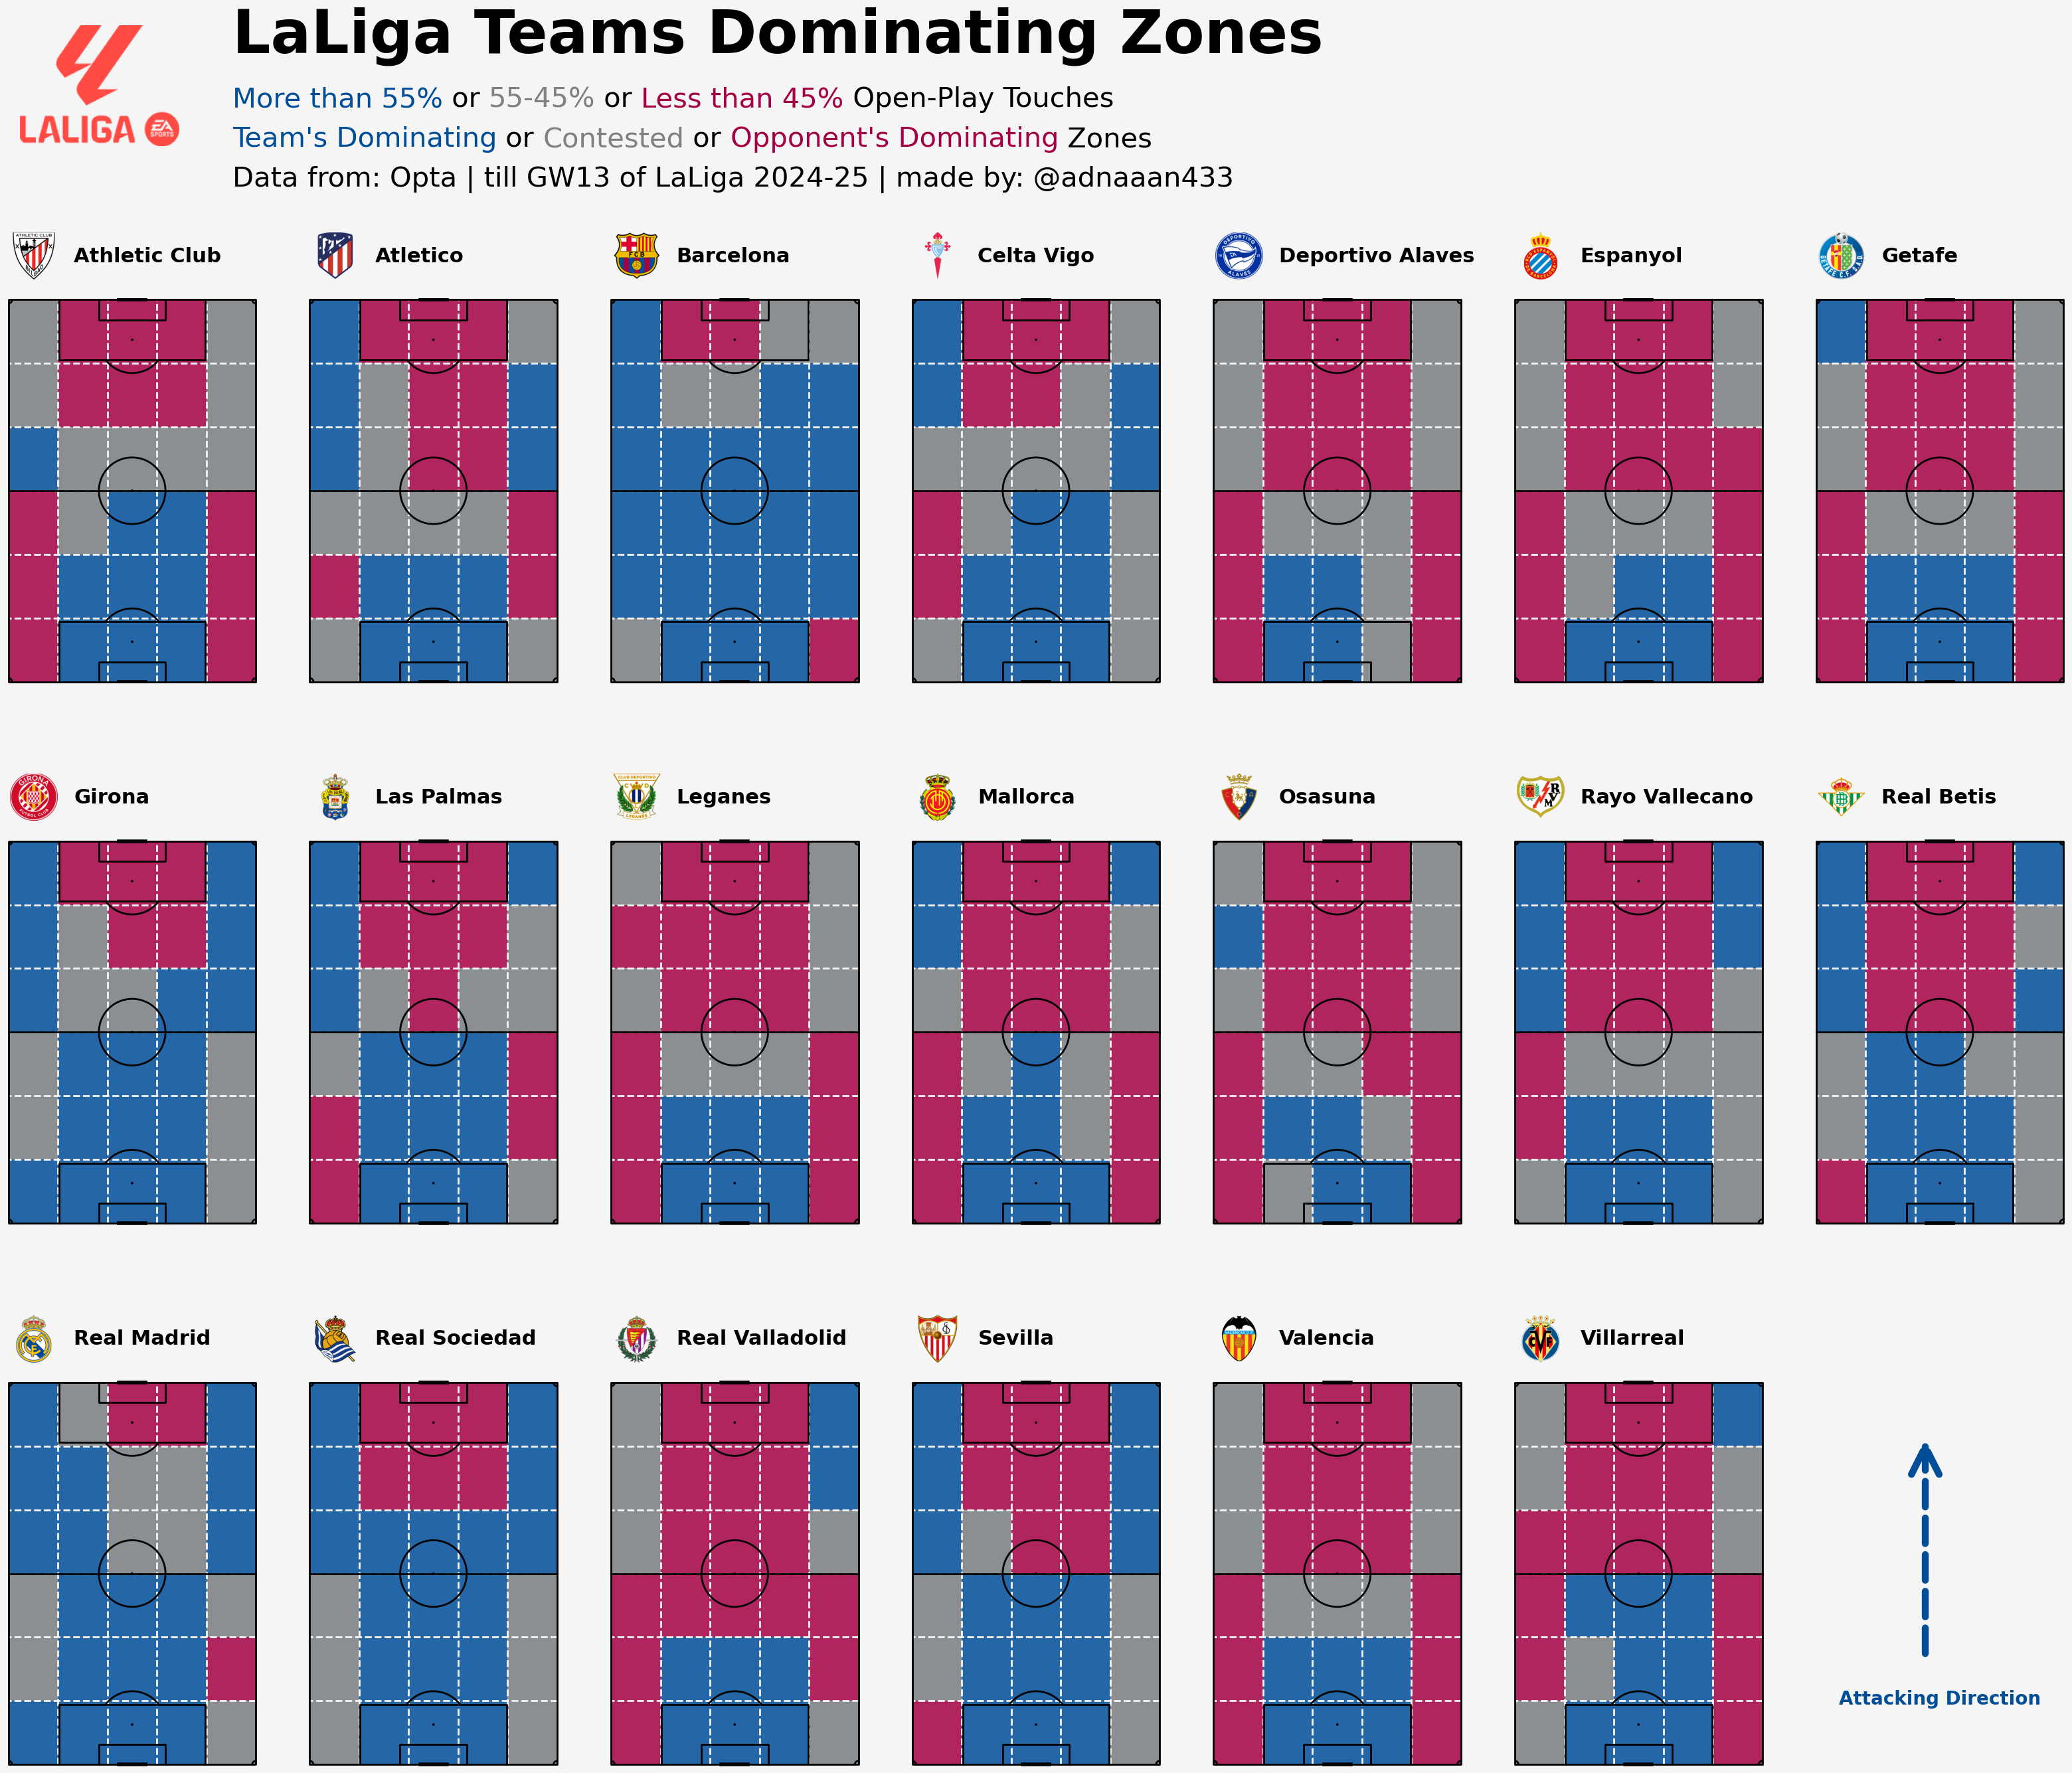

In [50]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(40, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver_selenium(axes[i], team_name)
    # plot_blank(axes[i])
plot_direction_ver(axes[20])


fig.text(0.21, 1.01, 'LaLiga Teams Dominating Zones', fontsize=65, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.97, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.95, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.93, "Data from: Opta | till GW13 of LaLiga 2024-25 | made by: @adnaaan433",
         fontsize=30, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/LaLiga%20.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)

# EPL

In [ ]:
col1 = '#A50044'
col2 = '#004D98'

C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

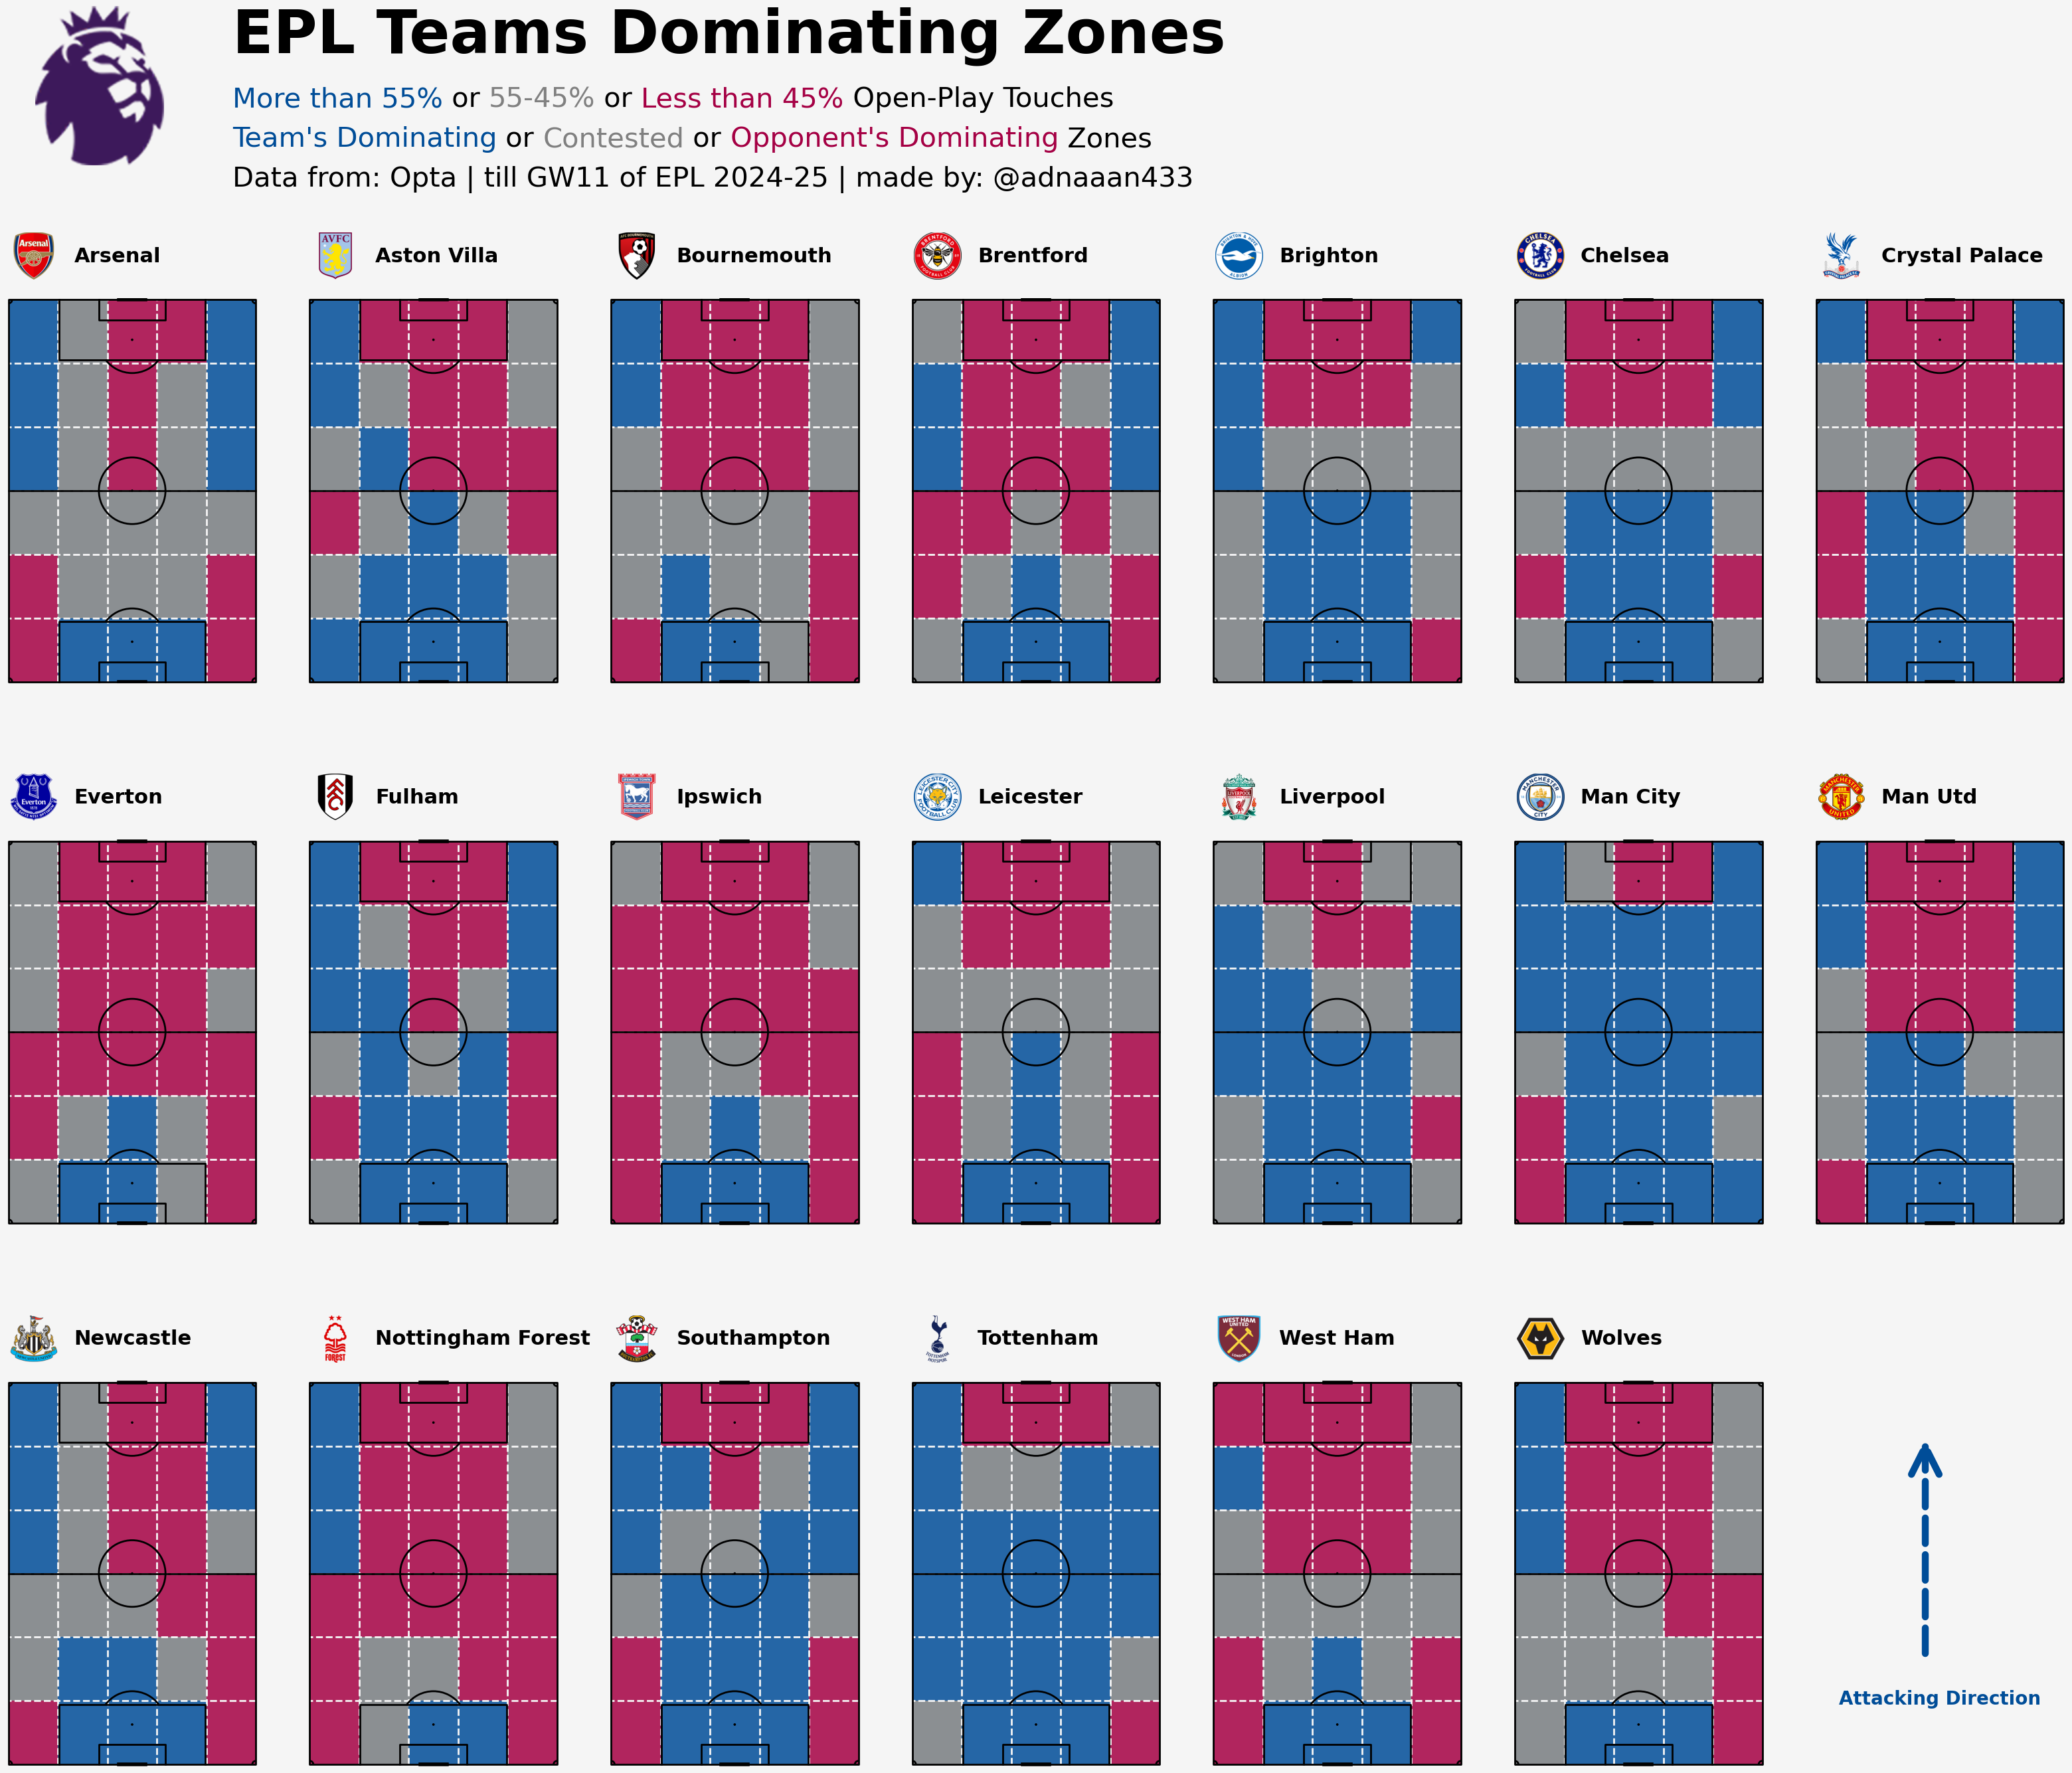

In [48]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(40, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver(axes[i], team_name)
    # plot_blank(axes[i])
plot_direction_ver(axes[20])

fig.text(0.21, 1.01, 'EPL Teams Dominating Zones', fontsize=65, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.97, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.95, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.93, "Data from: Opta | till GW11 of EPL 2024-25 | made by: @adnaaan433",
         fontsize=30, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/EPL_Logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)

# Serie A

C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\898805764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

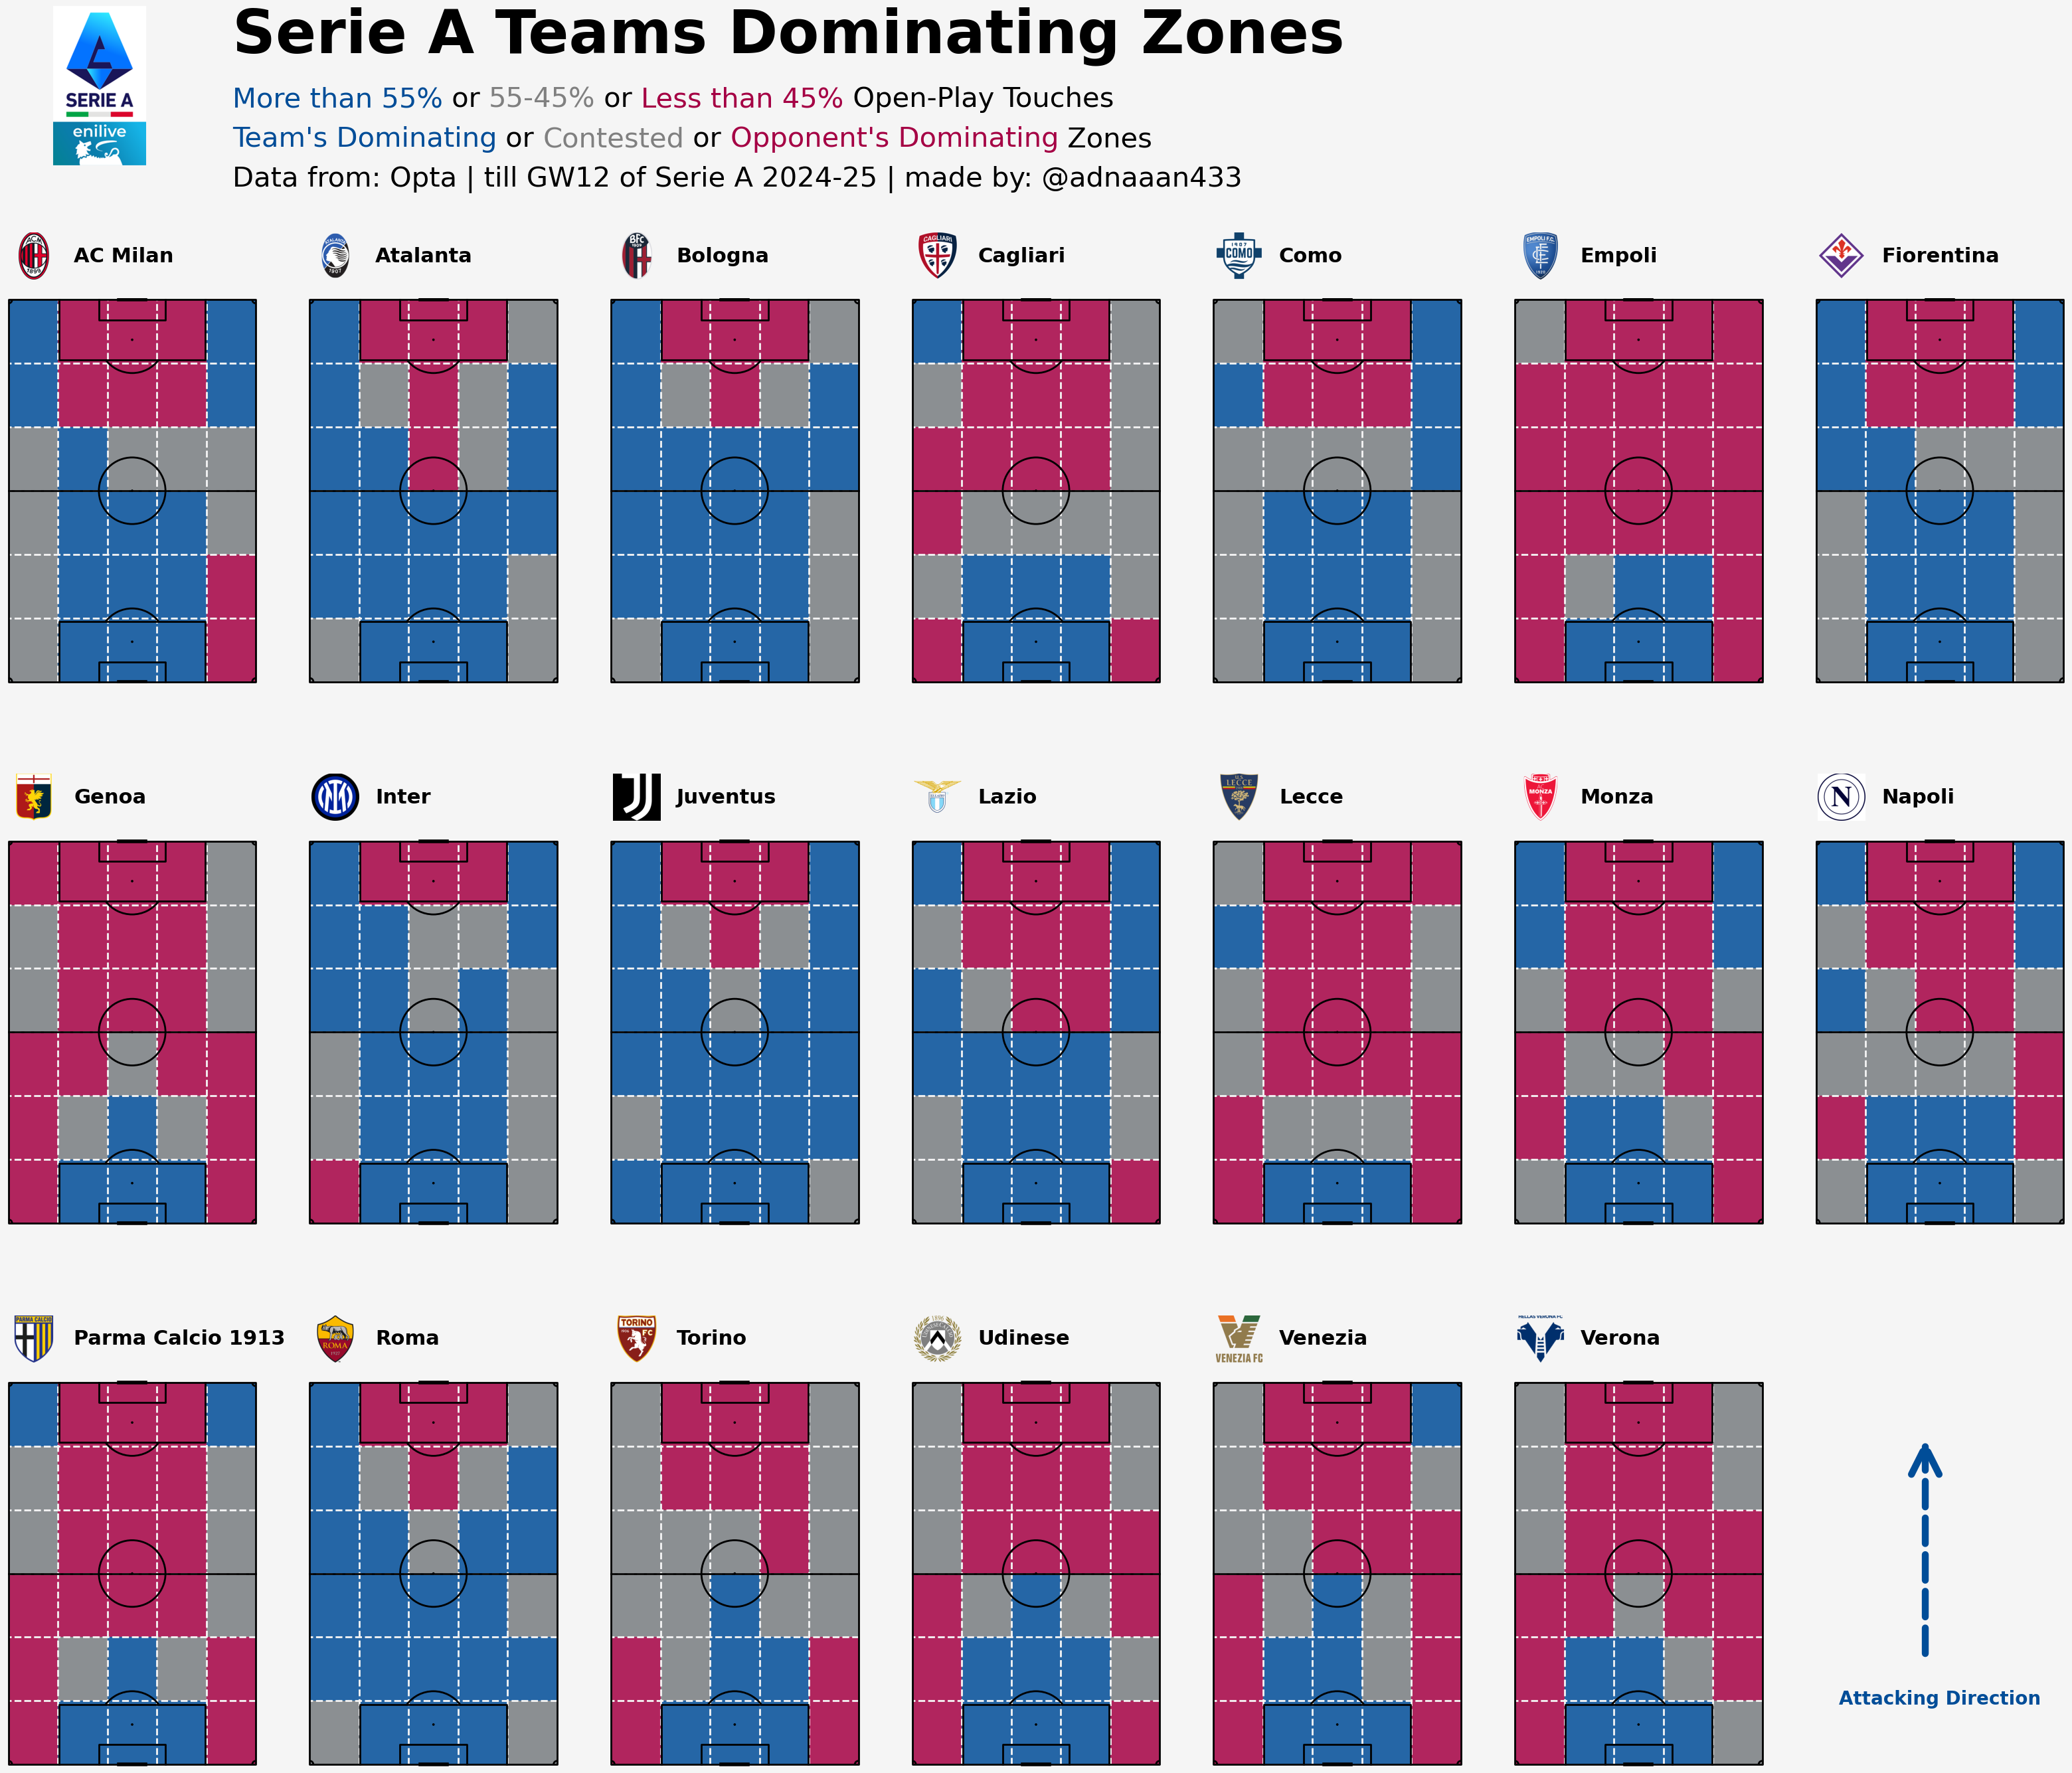

In [52]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(40, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver(axes[i], team_name)
    # plot_blank(axes[i])
plot_direction_ver(axes[20])

fig.text(0.21, 1.01, 'Serie A Teams Dominating Zones', fontsize=65, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.97, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.95, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=30, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.93, "Data from: Opta | till GW12 of Serie A 2024-25 | made by: @adnaaan433",
         fontsize=30, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/Serie_A_logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)

# Bundesliga

C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

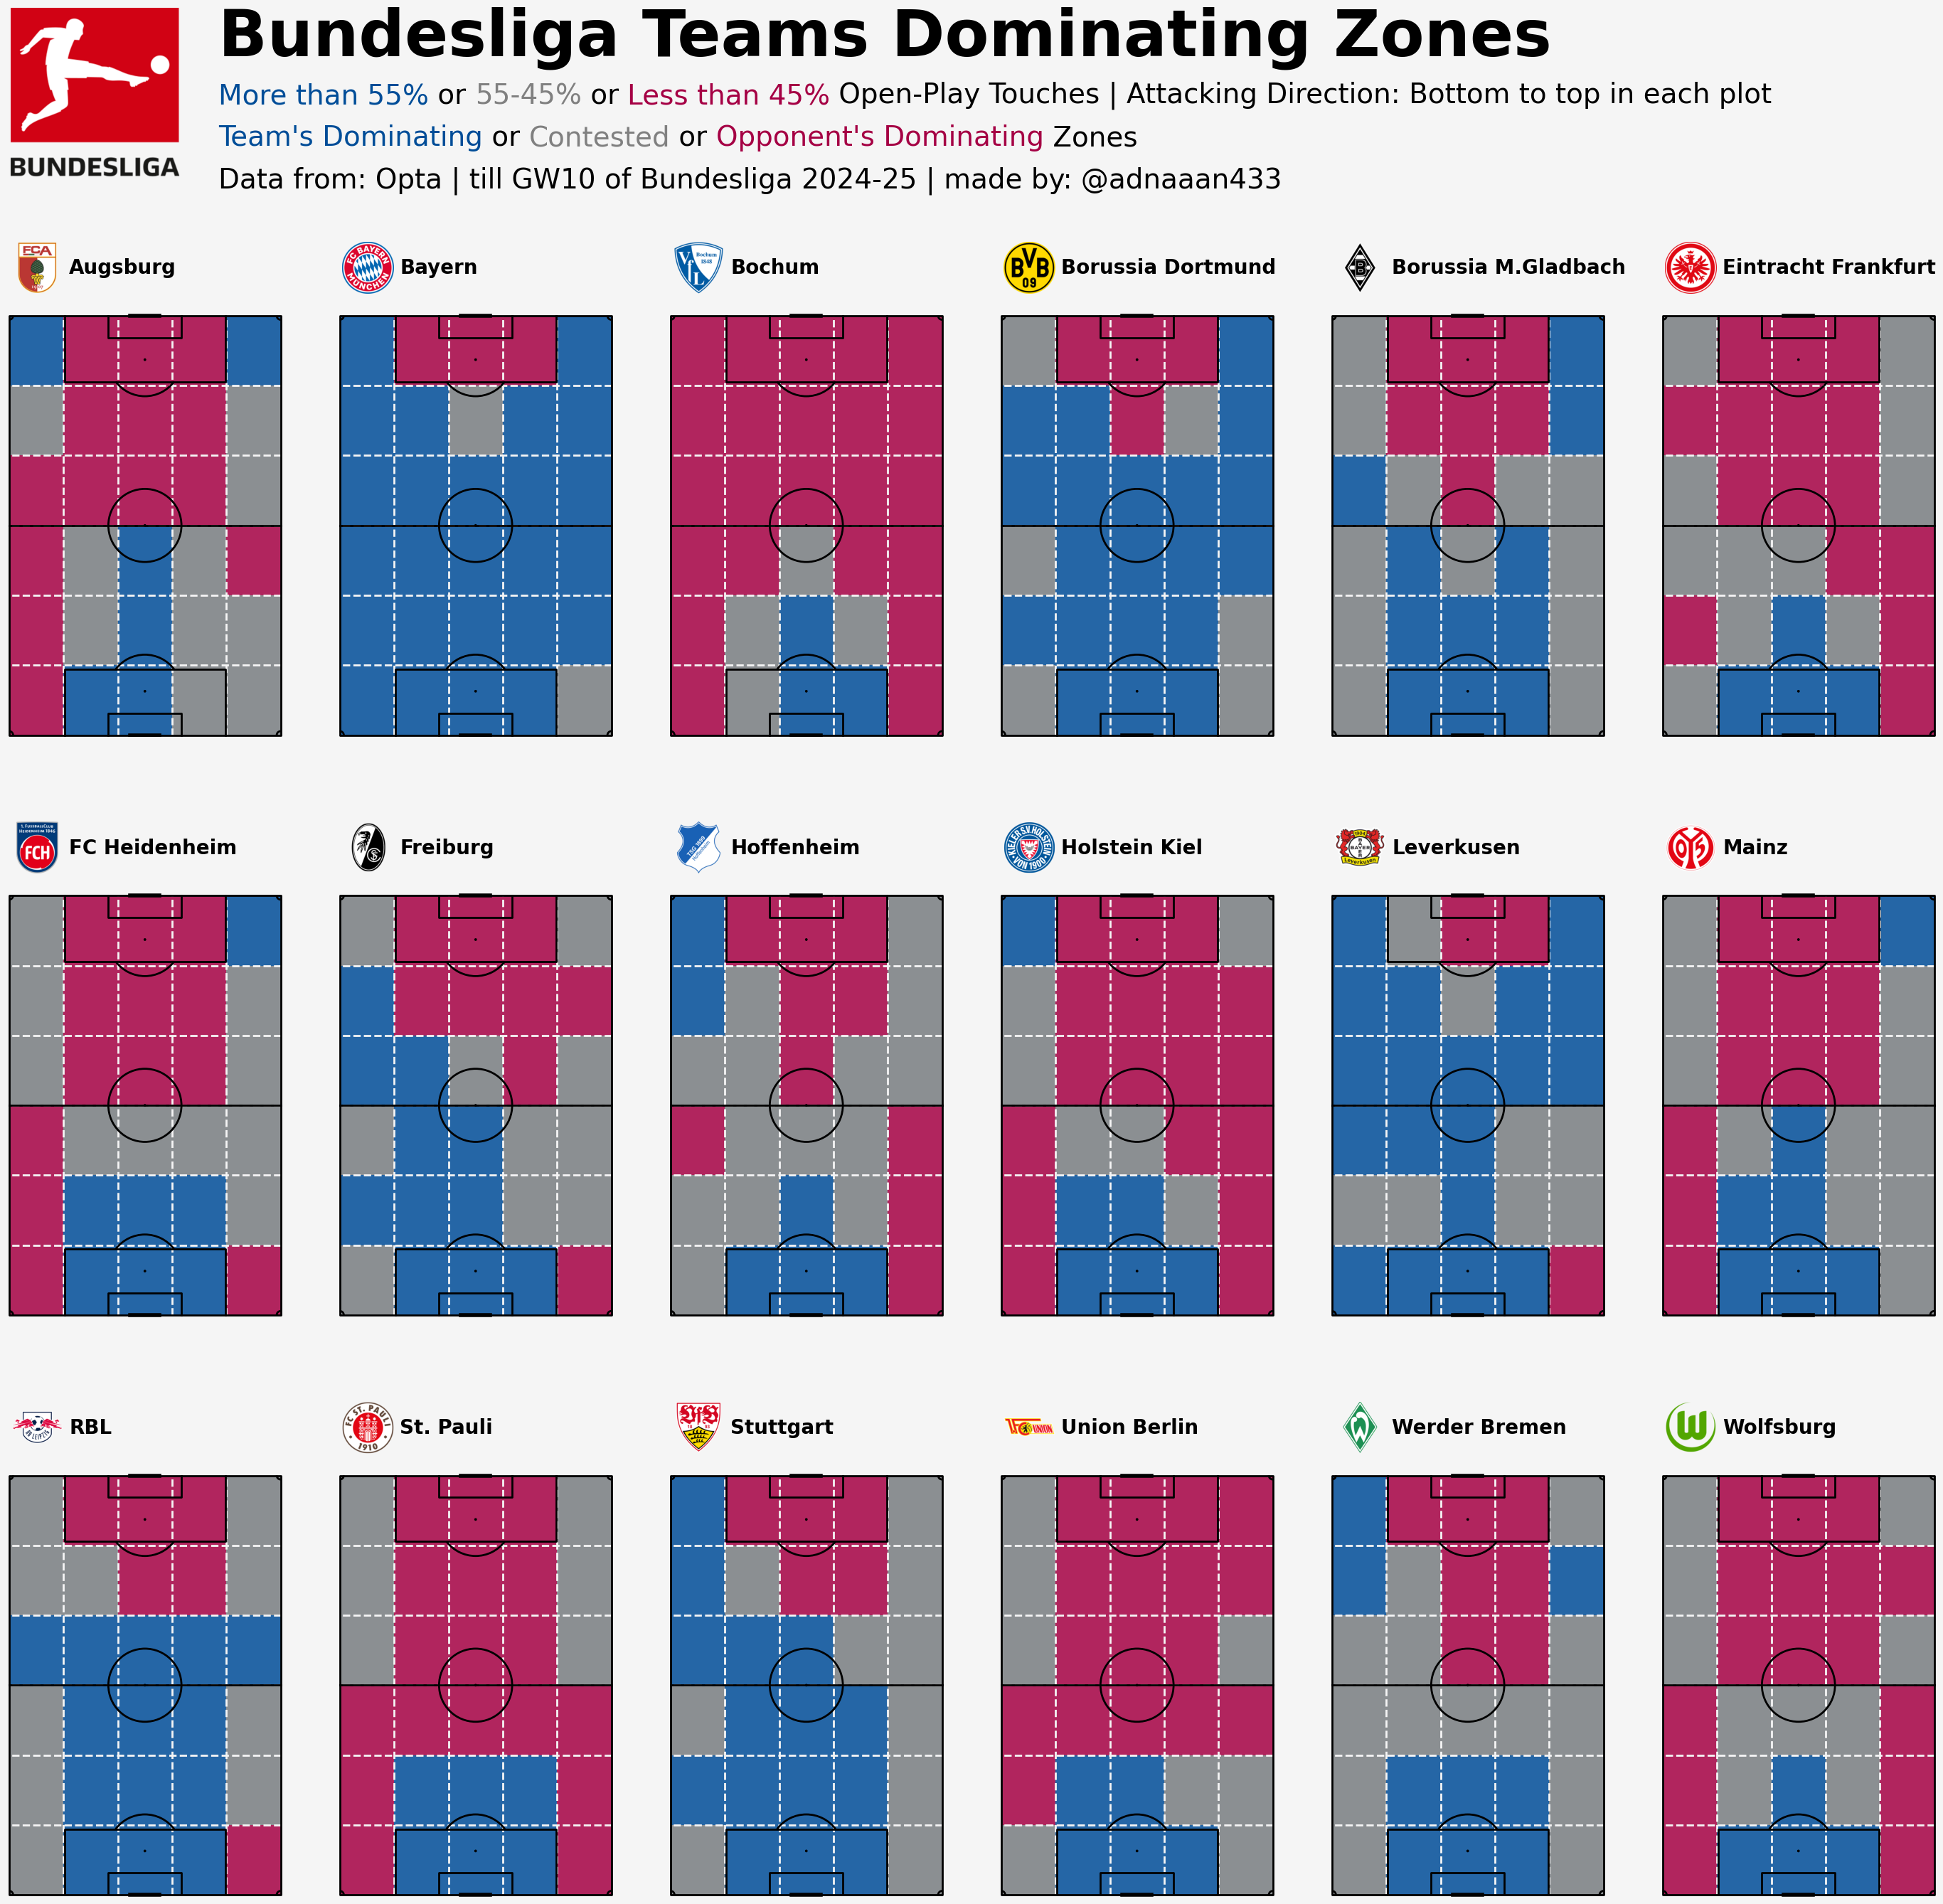

In [71]:
# List of team names
team_names = pd.Series(df.teamName.unique()).dropna()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(35, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver_selenium(axes[i], team_name)
    # plot_blank(axes[i])
# plot_direction_ver(axes[18])
# plot_blank_ver(axes[19])
# plot_blank_ver(axes[20])

fig.text(0.21, 1.01, 'Bundesliga Teams Dominating Zones', fontsize=65, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.975, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches | Attacking Direction: Bottom to top in each plot",
         fontsize=28, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.955, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=28, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.935, "Data from: Opta | till GW10 of Bundesliga 2024-25 | made by: @adnaaan433",
         fontsize=28, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/Bundesliga_logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)

# Ligue 1

C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_3868\960865614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

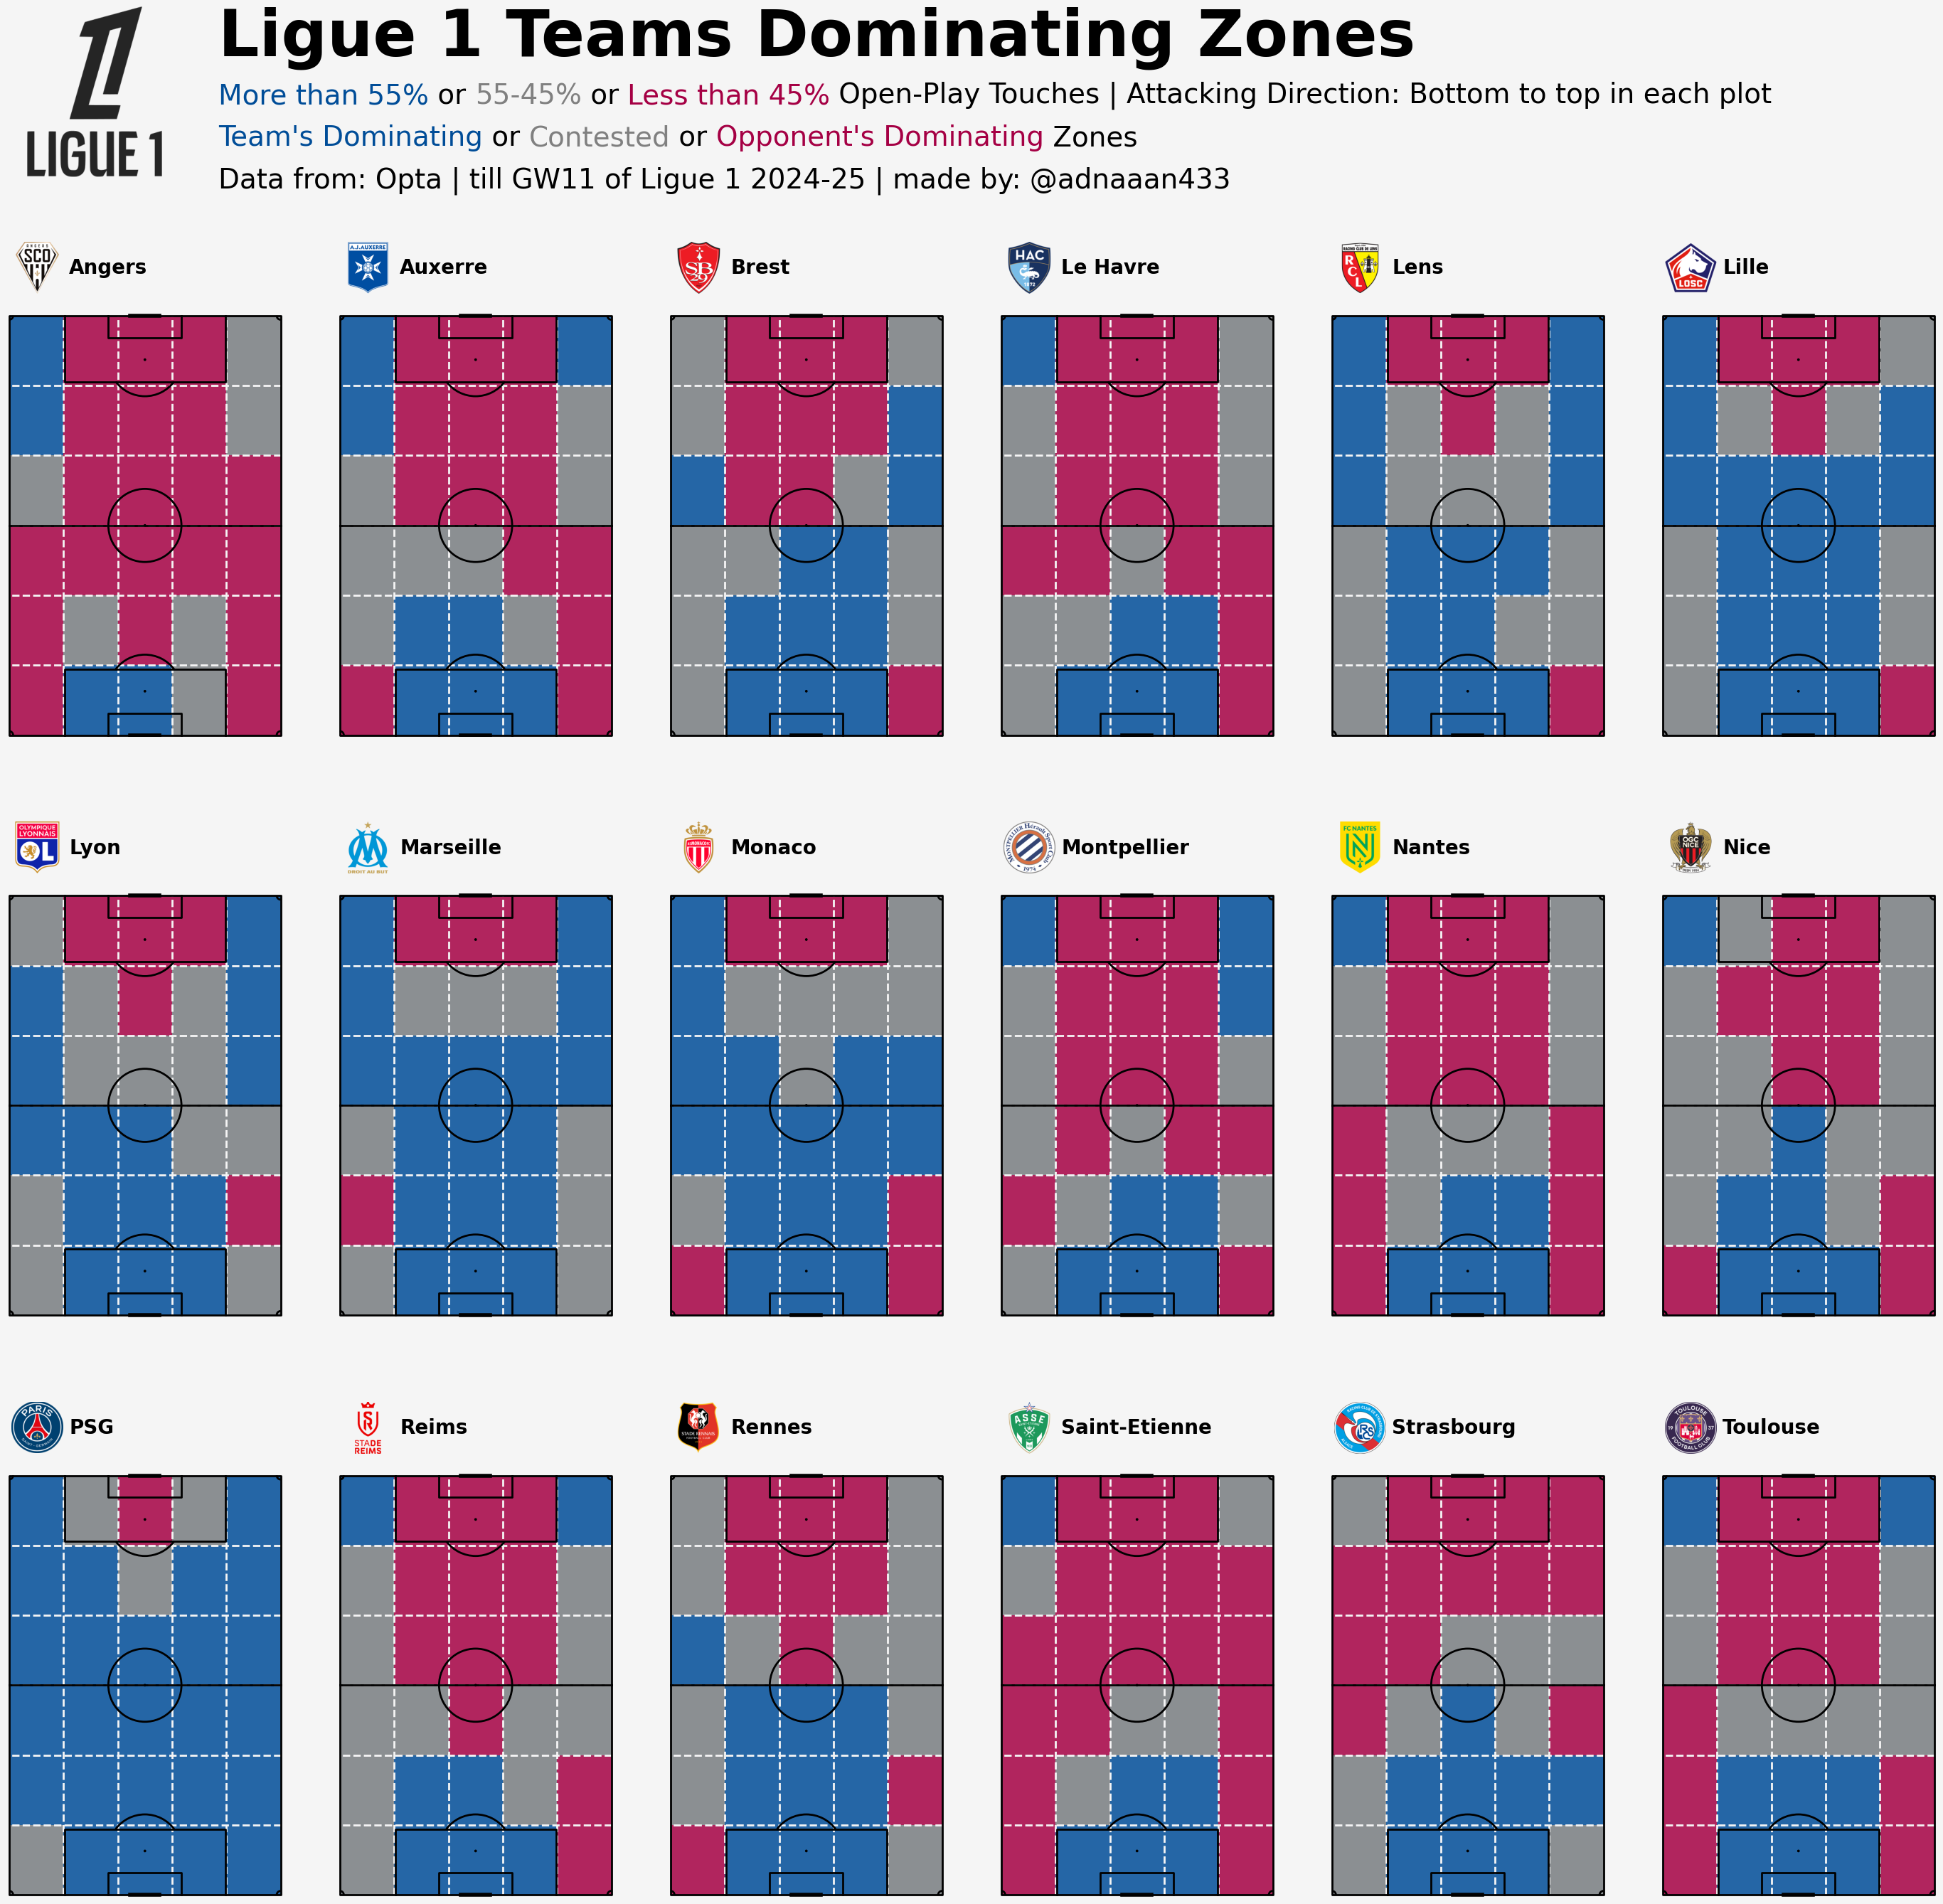

In [74]:
# List of team names
team_names = pd.Series(df.teamName.unique()).dropna()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(35, 30), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver_selenium(axes[i], team_name)
    # plot_blank(axes[i])
# plot_direction_ver(axes[18])
# plot_blank_ver(axes[19])
# plot_blank_ver(axes[20])

fig.text(0.21, 1.01, 'Ligue 1 Teams Dominating Zones', fontsize=65, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.975, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches | Attacking Direction: Bottom to top in each plot",
         fontsize=28, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.955, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones",
         fontsize=28, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.935, "Data from: Opta | till GW11 of Ligue 1 2024-25 | made by: @adnaaan433",
         fontsize=28, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/Ligue_1_logo.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)

# UCL

C:\Users\h\AppData\Local\Temp\ipykernel_8592\1886005712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_8592\1886005712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']


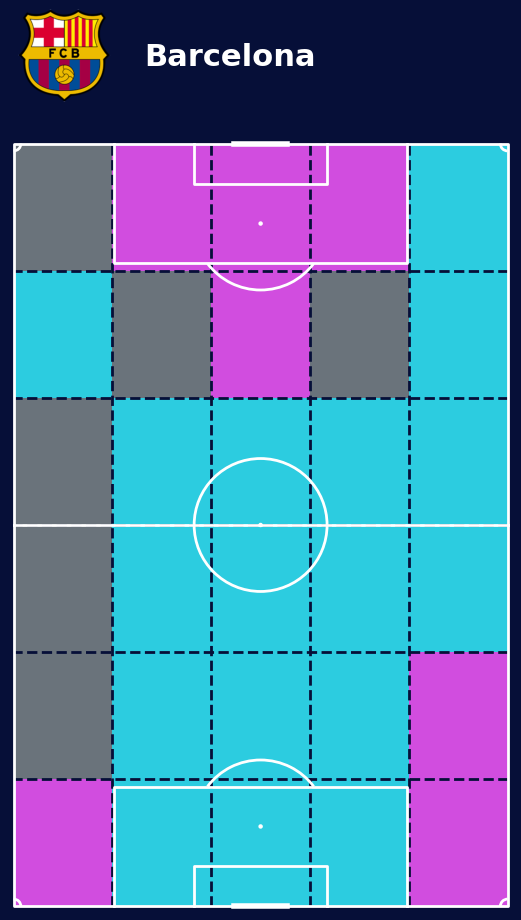

In [13]:
def plot_congestion_ver(ax, team_name):
    df_plot = df[(df['teamName']==team_name) | (df['oppositionTeamName']==team_name)]
    pcmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",  [col1, 'gray', col2], N=20)
    df1 = df_plot[(df_plot['teamName']==team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2 = df_plot[(df_plot['teamName']!=team_name) & (df_plot['isTouch']==1) & (~df_plot['qualifiers'].str.contains('CornerTaken|Freekick|ThrowIn')) &
                  (~df_plot['type'].str.contains('Card|CornerAwarded|Start|End|SubstitutionOn|SubstitutionOff|FormationChange|FormationSet|Penaltyfaced'))]
    df2['x'] = 105-df2['x']
    df2['y'] =  68-df2['y']
    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=2, line_zorder=6)
    pitch.draw(ax=ax)
    ax.set_ylim(-0.5, 105.5)
    ax.set_xlim(-0.5, 68.5)
    ax.invert_xaxis()

    bin_statistic1 = pitch.bin_statistic(df1.x, df1.y, bins=(6,5), statistic='count', normalize=False)
    bin_statistic2 = pitch.bin_statistic(df2.x, df2.y, bins=(6,5), statistic='count', normalize=False)

    # Assuming 'cx' and 'cy' are as follows:
    cx = np.array([[ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25],
               [ 8.75, 26.25, 43.75, 61.25, 78.75, 96.25]])

    cy = np.array([[61.2, 61.2, 61.2, 61.2, 61.2, 61.2],
               [47.6, 47.6, 47.6, 47.6, 47.6, 47.6],
               [34.0, 34.0, 34.0, 34.0, 34.0, 34.0],
               [20.4, 20.4, 20.4, 20.4, 20.4, 20.4],
               [ 6.8,  6.8,  6.8,  6.8,  6.8,  6.8]])

    # Flatten the arrays
    cx_flat = cx.flatten()
    cy_flat = cy.flatten()

    # Create a DataFrame
    df_cong = pd.DataFrame({'cx': cx_flat, 'cy': cy_flat})

    hd_values = []


    # Loop through the 2D arrays
    for i in range(bin_statistic1['statistic'].shape[0]):
        for j in range(bin_statistic1['statistic'].shape[1]):
            stat1 = bin_statistic1['statistic'][i, j]
            stat2 = bin_statistic2['statistic'][i, j]
        
            if (stat1 / (stat1 + stat2)) > 0.55:
                hd_values.append(1)
            elif (stat1 / (stat1 + stat2)) < 0.45:
                hd_values.append(0)
            else:
                hd_values.append(0.5)

    df_cong['hd']=hd_values
    bin_stat = pitch.bin_statistic(df_cong.cx, df_cong.cy, bins=(6,5), values=df_cong['hd'], statistic='sum', normalize=False)
    pitch.heatmap(bin_stat, ax=ax, cmap=pcmap, edgecolors='#000000', lw=0, zorder=3, alpha=0.85)

    ax.text(50, 117, f"{team_name}", color=line_color, fontsize=22, fontweight='bold', ha='left', va='center')

    ax.hlines(1*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(2*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(3*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(4*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)
    ax.hlines(5*(105/6), xmin=0, xmax=68, color=bg_color, lw=2, ls='--', zorder=5)

    ax.vlines(1*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(2*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(3*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)
    ax.vlines(4*(68/5), ymin=0, ymax=105, color=bg_color, lw=2, ls='--', zorder=5)

    IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = pitch.inset_image(117, 61, image, height=13, ax=ax)
    
    return

fig,ax=plt.subplots(figsize=(10,10), facecolor=bg_color)
plot_congestion_ver(ax, 'Barcelona')

C:\Users\h\AppData\Local\Temp\ipykernel_8592\1886005712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x'] = 105-df2['x']
C:\Users\h\AppData\Local\Temp\ipykernel_8592\1886005712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y'] =  68-df2['y']
C:\Users\h\AppData\Local\Temp\ipykernel_8592\1886005712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

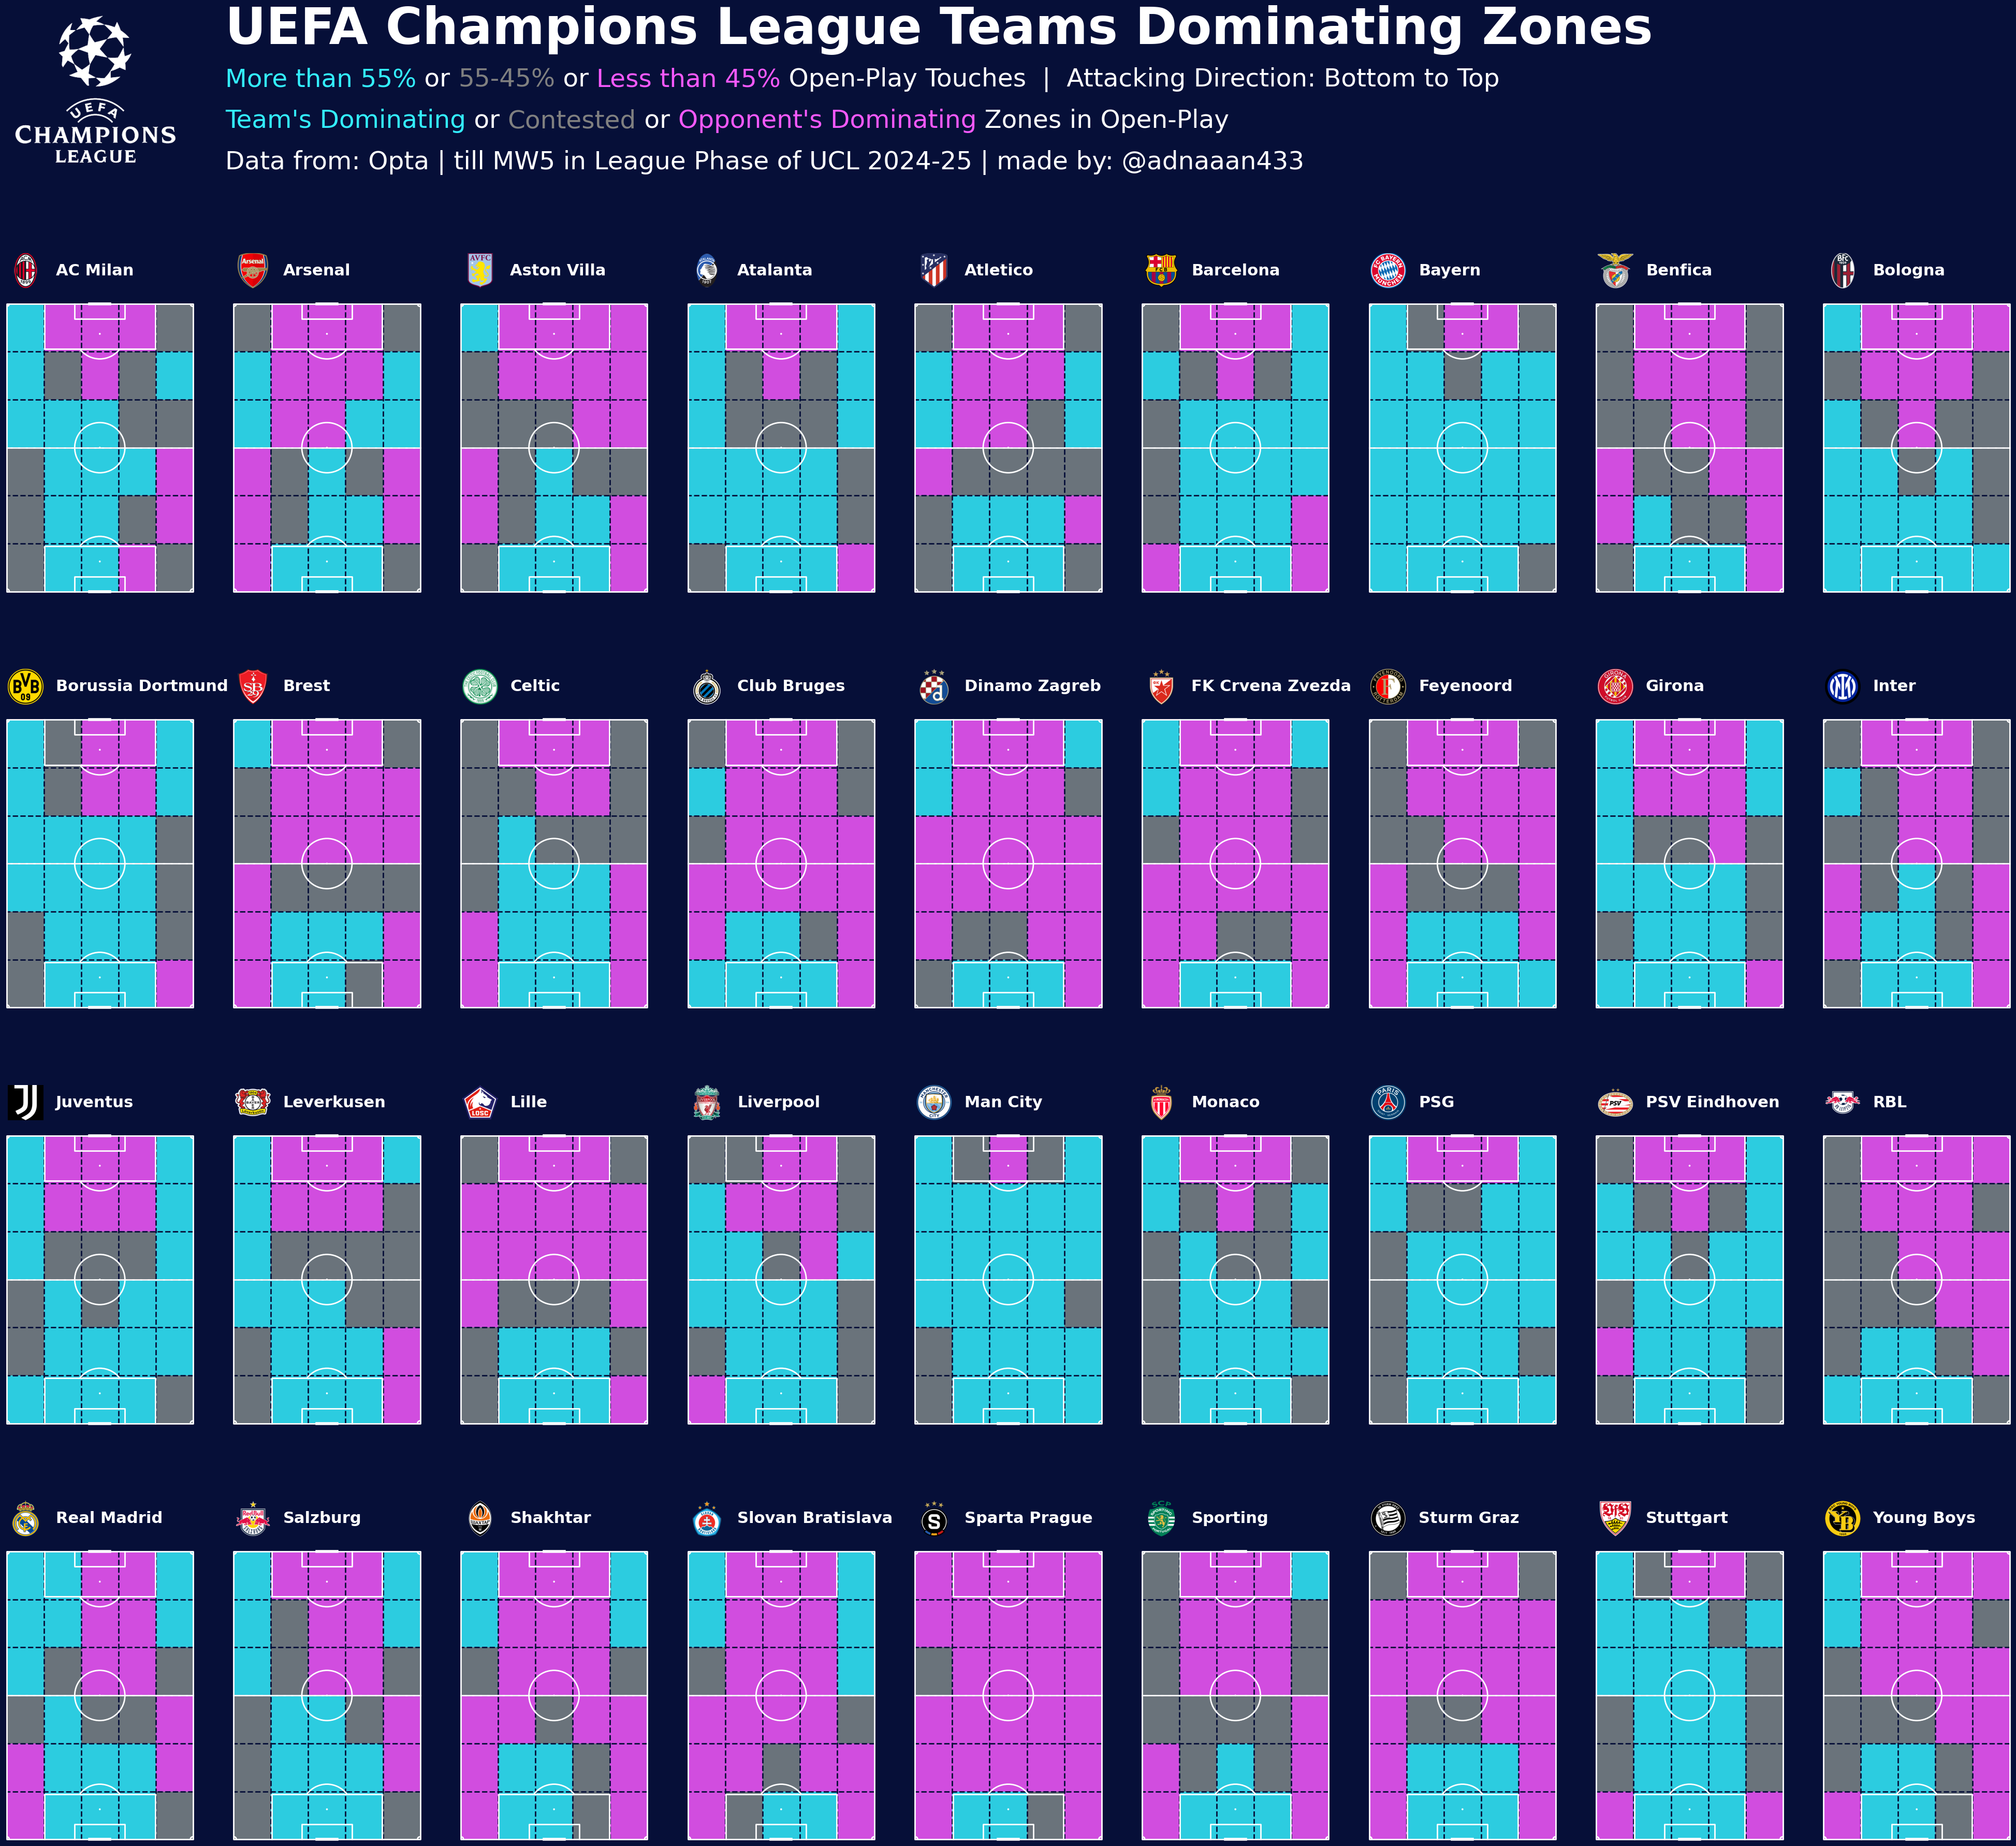

In [32]:
# List of team names
team_names = df.teamName.unique()

# Create a DataFrame with team names and their diffe values
team_diffe = pd.DataFrame({'teamName': team_names})
team_diffe = team_diffe.sort_values(by='teamName')

# Create the figure and axes for a 4x5 grid
fig, axes = plt.subplots(nrows=4, ncols=9, figsize=(50, 40), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, row in enumerate(team_diffe.itertuples()):
    team_name = row.teamName
    plot_congestion_ver(axes[i], team_name)
    # plot_blank_ver(axes[i])
# plot_direction_ver(axes[20])


fig.text(0.21, 1.01, 'UEFA Champions League Teams Dominating Zones', color=line_color, fontsize=70, fontweight='bold', ha='left', va='top')
fig_text(0.21, 0.98, "<More than 55%> or <55-45%> or <Less than 45%> Open-Play Touches  |  Attacking Direction: Bottom to Top",
         fontsize=35, color=line_color, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig_text(0.21, 0.96, "<Team's Dominating> or <Contested> or <Opponent's Dominating> Zones in Open-Play",
         fontsize=35, color=line_color, ha='left', va='top', highlight_textprops=[{'color':col2}, {'color':'gray'}, {'color':col1}])
fig.text(0.21, 0.94, "Data from: Opta | till MW5 in League Phase of UCL 2024-25 | made by: @adnaaan433",
         fontsize=35, color=line_color, ha='left', va='top')

image_url = 'file:///D:/FData/Leagues_logos/UEFA_Champions_League_White.html'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.08, height=0.08)